# chapter 4.2

---

# import

In [236]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

---

정리할 것

- gpt로 코드 짜지 말자.
- 최대한 쉽게 예제를 만들어볼 것
- 확률분포에 대한 이해

# 1. Naive bayes (Option Reaing)

`-` 41page

In GDA, the feature vectors x were **continuous, real-valued vectors**. Let’s
now talk about a different learning algorithm in which the xj
’s are **discretevalued.**


        GDA는 벡터 x의 특성이 연속형인 실제 값이지만 이산적인 x에 대한 다른 기계학습에 대해서 알아보려고 한다.

`-` 예시 

For our motivating example, consider building an email spam filter using
machine learning. Here, we wish to classify messages according to whether
they are unsolicited commercial (spam) email, or non-spam email. After
learning to do this, we can then have our mail reader automatically filter
out the spam messages and perhaps place them in a separate mail folder.
Classifying emails is one example of a broader set of problems called text
classification.
Let’s say we have a training set (a set of emails labeled as spam or nonspam). We’ll begin our construction of our spam filter by specifying the
features xj used to represent an email.



- 이메일을 스팸 메시지인지 아닌지를 분류해주는 알고리즘을 고려
- 그러나 이메일은 문자로 이루어진 텍스트 데이터이다
- 이때 우리는 이메일의 특성을 x로 입력하여 스팸 분류를 하려고 한다.

`-` vector x의 구성

We will represent an email via a feature vector whose length is equal to
the number of words in the dictionary. Specifically, if an email contains the
j-th word of the dictionary, then we will set xj = 1; otherwise, we let xj = 0.

        우리는 사전에 등재되있는 단어의 수와 같은 길이의 백터 특징을 이메일로 나타낼 것이다. 특히 만약 j번째 단어를 이메일이 포함한다면 우리는 $x_j$를 1 그렇지 않으면 0으로 설정할 것이다.

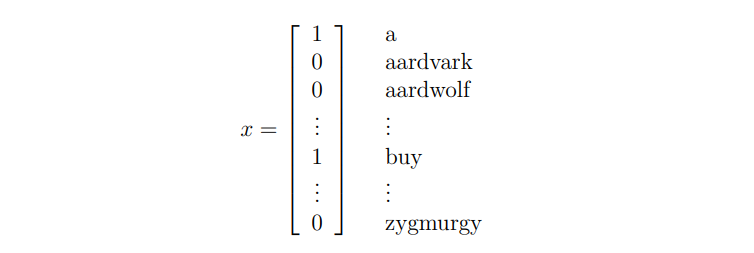

The set of words encoded into the
feature vector is called the vocabulary, so the dimension of x is equal to
the size of the vocabulary

        벡터 특징이 인코딩된 단어의 집합을 the vocabulary라고 부른다. 그리고 변수 x의 차원은 the vocabulary의 크기와 같다.

`-` 구현

In [38]:
# 무작위로 타이핑친 text data 
text = "buy i sale super sale show buy buy go i"
tt_splt = text.split(' ')
# x dimension
print("x의 차원 : {}".format(len(tt_splt)))

x의 차원 : 10


In [164]:
# 분류하고자 하는 어휘 j로 시작하는 단어들 = 1 not = 0

def f1(x,key):
    lst = []
    for i in range(len(x)):
        if key == x[i] :
            lst.append(1)
        else :
            lst.append(0)
    return np.array(lst)

In [167]:
sum(f1(tt_splt,'buy')) / len(tt_splt)

0.3

In [744]:
# buy 단어 3개
ff = f1(tt_splt,'buy')
[(tt_splt[x],v) for x,v in enumerate(ff)]

[('buy', 1),
 ('i', 0),
 ('sale', 0),
 ('super', 0),
 ('sale', 0),
 ('show', 0),
 ('buy', 1),
 ('buy', 1),
 ('go', 0),
 ('i', 0)]

In [56]:
#set_tt = [i for i in set(tt_splt)] # 중복어휘 제거
# 중복어휘를 제거한 모든 어휘의 1,0 변환
#[f1(set_tt,set_tt[i]) for i in range(len(set_tt))]

`-` model that build a generative

42p

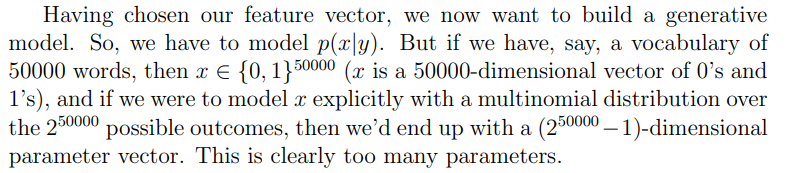

- Having chosen our feature vector, we now want to build a generative
model. So, we have to model p(x|y).
- This is clearly too many parameters

5만개의 단어가 있다면 0과 1로 이진분류를 다항 분포로 모형화한다면 $2^{50000}$의 
가능한 결과가 나온다. 또한 차원은 $(2^{50000} -1)$으로 끝나게 된다.
이것은 너무 많은 매개변수를 가지게 된다.

`-` very strong assumption

 To model p(x|y), we will therefore make a very strong assumption. We will
assume that the xi
’s are conditionally independent given y. This assumption
is called the Naive Bayes (NB) assumption, and the resulting algorithm is
called the Naive Bayes classifier.

따라서 우리는 강력한 가정을 할 것, 바로 x는 조건부적으로 독립이라고 가정을 할 것이다.

`-` 예시

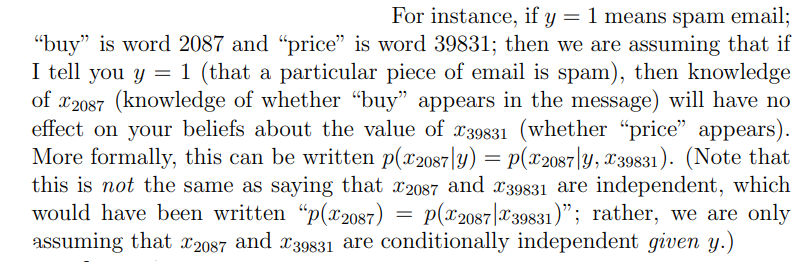

- buy 2087번째 단어, price 39831번째 단어
- 스팸 메일일 경우 1로 분류한 경우 우리는 y=1에 대한 각자의 단어가 영향을 주지 않는다고 가정한다
- 즉 각자의 단어가 등장하는 확률에 대해서 서로가 연관성은 없다고 보는 것

`-` 분포 추정

The first equality simply follows from the usual properties of probabilities,
and the second equality used the NB assumption.
We note that even though the Naive Bayes assumption is an extremely strong assumptions, the resulting algorithm works well on many problems.

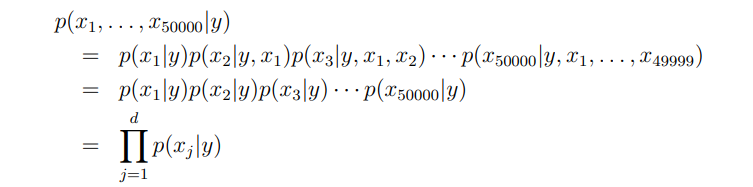

나이브 베이즈 가정은 매우 강력한 가정이지만 알고리즘 문제에서 잘 작동한다.

`-` 추정해야할 모수

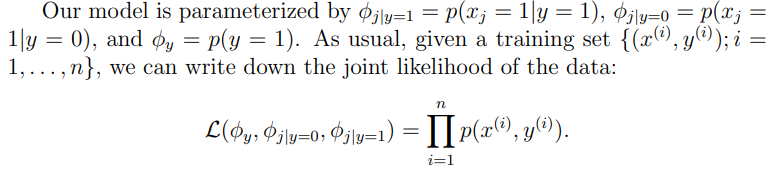

추정하는 모수는 3가지이다.
- y가 스팸일 때, x의 단어가 포함됐을 확률
- y가 스팸이 아닐 때, x의 단어가 포함됐을 확률
- y가 스팸일 확률 

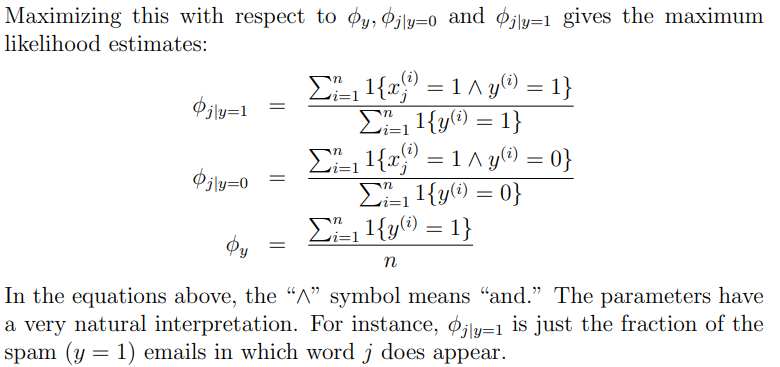

`-` 실습

buy가 일정 이상 들어간 메시지는 스팸으로 분류하려고 한다.

- $\phi_{j|y=1}$ = 스팸메일 중에서 해당 단어가 들어간 확률
- $\phi_{j|y=0}$ = 스팸메일 아니면서 해당 단어가 들어간 확률
- $\phi_{y}$ = 전체 메일 중 스팸메일일 확률

`-` 가정

- 전체메일 : 10개
    - 스팸메일 : 4개
    - 비스팸메일 : 6개
- buy가 들어간 경우
    - 스팸메일 : 4개중에서 3번 들어감
    - 비스팸메일 : 6개중에서 1번 들어감

- $\phi_{j|y=1}$ = 3/4
- $\phi_{j|y=0}$ = 1/4
- $\phi_{y}$ = 0.4

buy가 들어간 메일이 스팸일 확률

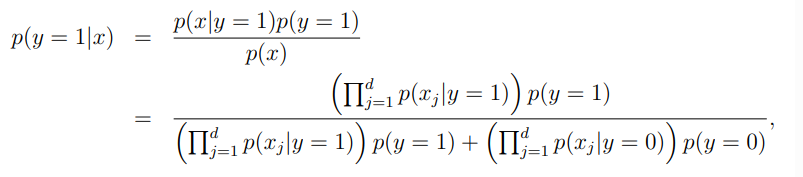

In [3]:
3/4 * 0.4 / (3/4*0.4 + 1/6 * 0.6)

0.7500000000000001

---

In [430]:
x = ['buy sale',#스팸
 'buy market', #스팸
 'buy buy',#스팸
 'buy pi',
 'sale beta']
y = np.array([1,1,1,0,0])

In [5]:
# a = buy , b= sale
a, b= 2/3*0.6 / (2/3*0.6 + 1/2*0.4) , 1/2*0.6 / (1/2*0.6 + 1/2 *0.4)
a,b

(0.6666666666666666, 0.6)

In [6]:
# 'buy sale'이란 문장이 가지는 확률분포
a*b*0.6 /( a*b*0.6 + ((1-a)*(1-b)*0.4))

0.818181818181818

`-` 새로운 메시지 업데이트

In [437]:
x = ['buy sale',
 'buy market', 
 'buy buy',
 'buy pi',
 'sale beta',
 'buy new',#새로운 메시지 스팸
 'new sale',#새로운 메시지 스팸
 'buy pi'#새로운 메시지 비스팸
    ]
y = np.array([1,1,1,0,0,1,1,0])

In [9]:
# buy와 새로운 단어 new가 적힌 메일 3개가 날라옴
# 그중에서 2개는 스팸메일로 분류되었다
a = 4/5*5/8 / (4/5*5/8 + 2/3*3/8) 
b = 2/5*5/8 / (2/5*5/8 + 1/3 *3/8)
a,b

(0.6666666666666666, 0.6666666666666666)

In [11]:
# 'buy sale'이란 문장이 가지는 확률분포
a*b*5/8 /( a*b*0.6 + (2/3*1/3*3/8))

0.7936507936507937

Lastly, we note that while we have developed the Naive Bayes algorithm
mainly for the case of problems where the features $x_j$ are binary-valued, the
generalization to where $x_j$ can take values in $\left\{1, 2, . . . , k_j \right\}$ is straightforward.
Here, we would simply model $p(x_j
|y)$ as multinomial rather than as Bernoulli.
Indeed, even if some original input attribute (say, the living area of a house,
as in our earlier example) were continuous valued, it is quite common to
discretize it—that is, turn it into a small set of discrete values—and apply
Naive Bayes. For instance, if we use some feature $x_j$ to represent living area,
we might discretize the continuous values as follows

- 우리는 이진분류의 문제인 경우 나이브베이즈 알고리즘을 개발해왔다.
- 하지만 다항식으로 모델링도 가능하며 연속형 변수도 작은 이산 값 셋으로 변환하여 이산화를 적용한다

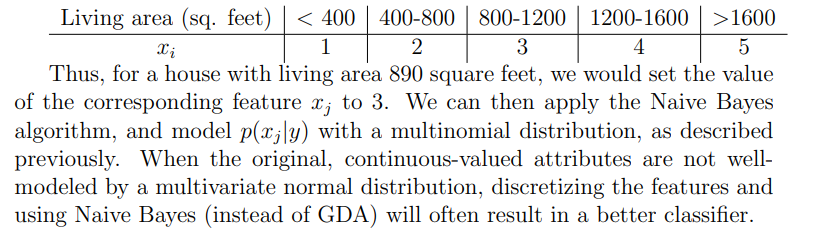

- 나이브베이즈 알고리즘과 다항분포를 사용한 모델을 적용할 수 있다.
- 원래의 연속형 값 속성이 다변량 정규분포에 의해 잘 모델링되지 않은 경우 특성을 이산화하고 나이브베이즈를 사용하면 종종 더 좋은 분류기를 만들 수 있다.
- 잘 모델링되지 않은 이유?

---

# 2. Laplce smoothing
44p

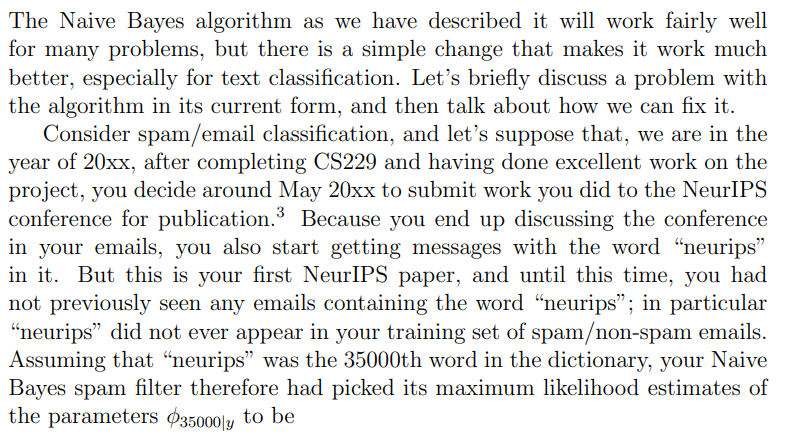

나이브베이즈 알고리즘은 많은 문제를 잘 해결하지만 특히 text classification에서 더 좋은 수행을 할 수 있는 간단한 change가 있다.

`-` 예시

- 스팸/이메일 분류를 고려
- 프로젝트를 마친 후 출판을 위해 NeurIPS 컨퍼런스에 제출하기로 결정
- NeurIPS 단어가 포함된 메시지를 받게 된다.
- 그러나 이전에 단 한번도 NeurIPS 단어가 포함된 이메일이 없었음
- 특히 train set에서도 NeurIPS이란 단어는 없었다.
- 따라서 "neurips"를 35000번째 단어라고 가정하면 우리의 나이브베이즈 스팸 필터는 35000번째 단어가 가진 분포의 최대 가능도를 추정할 것이다.

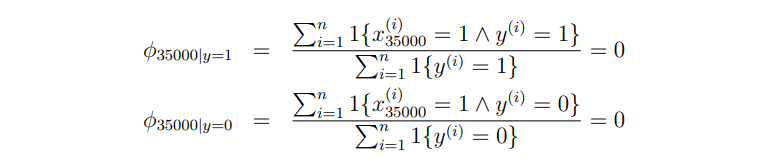

이런식으로 추정하게 될 건데, 그러한 이유는 단 한번도 neurips란 단어를 스팸이나 이메일 train set에서 본적이 없기 때문이다

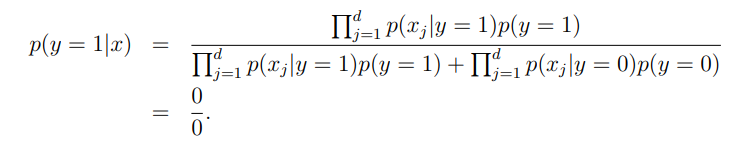

결국 이 단어가 포함된 이메일이 스팸인지를 결정하려고 사후확률을 계산하고 하면 위와 같이 된다. 왜냐하면 $p(x_{35000}|y) = 0$인채로 곱해지기 때문이다. 이렇게 되면 우린 예측을 할 수 없게 되버린다.

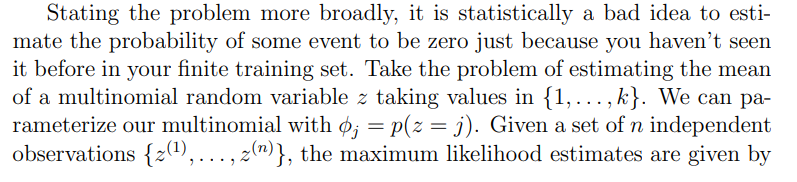

- 이것을 넓게 보자면, 정해져있는 훈련세트에서 본적이 없는 사건의 확률을 0으로 추정하는 것은 통계적으로 좋지 않아보임
- 우린 {1,...,k}의 값을 취하는 다항식의 랜덤 변수z의 평균을 추정하는 문제를 볼 때
- $\phi = p(z=j)$로 나타낼 수 있음
- n개의 독립적인 관측된 집합이 주어진다면 최대우도 추정치는 이와 같다. 

$$
\phi_j = \frac{\sum^n_{i=1}{1\left\{ z^i = j \right\}}}{n}
$$

- 위의 식은 n개의 데이터중에서 z가 특정 단어일 확률
- 이렇게 된다면 $\phi$의 일부가 0으로 끝나는데 이것은 문제가 된다
- 따라서 추정치를 대체하는  Laplace smoothing를 사용

$$
\phi_j = \frac{1+\sum^n_{i=1}{1\left\{ z^i = j \right\}}}{k+n}
$$

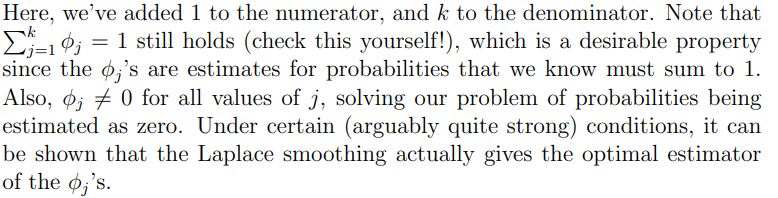

- 본적이 없는 단어이지만 한 번 보았다고 가정하는 셈
- 따라서 각 어휘마다 분자가 +1이 되므로 분모에서 각 고유한 어휘의 수만큼을 더 해주어야한다
- 여전히 $\phi$의 합은 1이다.
- 그리고 $\phi$가 0이되는 문제를 해결할 수 있음
- 특정 조건에서 라플라스 평활은 좋은 추정치를 제공할 수 있다.

In [746]:
### 기존 단어의 확률
a ,b ,c = 1/2 , 1/2, 0 

# 라플라스 스무딩
a = (1+1)/(3+2)
b = (1+1)/(3+2)
c = (1+0)/(3+2) # 새로운단어 

# 확률
print(f'a단어 : {a}\nb단어 : {b}\nnew 단어 : {c}\n확률합 : {a+b+c}')

a단어 : 0.4
b단어 : 0.4
new 단어 : 0.2
확률합 : 1.0


`-` Naive Bayes classifier with Laplace smoothing

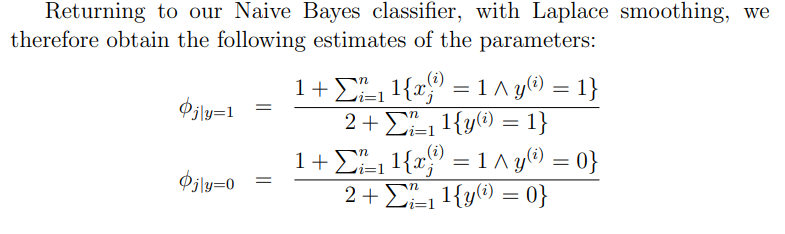

라플라스 스무딩을 적용한 어떤 단어 $x_j$에 대한 y가 1과 0일때의 확률 분포는 위와 같다.

- $\phi_y$에 라플라스 평활을 적용할지는 큰 중요한 부분은 아님
- 스팸과 비스팸 메시지에 각각에 공정하게 차지하기 때문
- 따라서 0으로 추정할 때보단 훨씬 합리적일 수 있다.

---

# 3. Event models for text classification

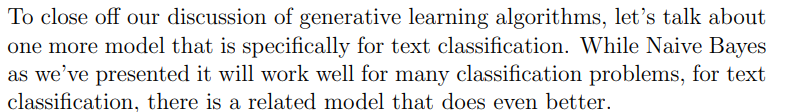

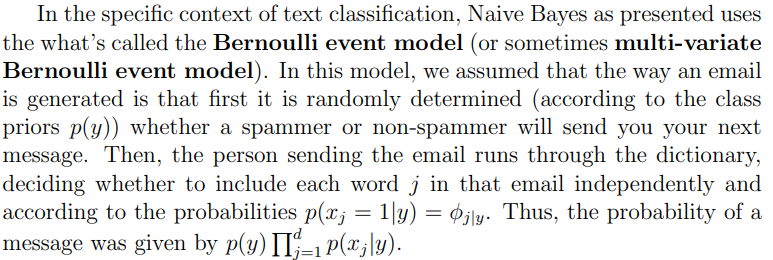

- 나이브 베이즈 알고리즘은 베르누이 이벤트모델이라고 불리는 것을 이용한다.
- 이 방식에서 우리는 생성된 이메일이 클래스에 따라 무작위로 결정될 것이다 이것은 사전확률을 따르고 스팸발송자 또는 비스팸발송자가 다음메시지를 보내느냐 의미이다.
- 이메을 보내는 사용자는 사전을 실행하여 확률 $p(x_j=1|y) = \phi_{j|y} $에 따라 각 단어 j를 해당 전메일에 독립적으로 포함할지를 결정
- 따라서 메시지의 확률은 $p(y)\prod^d_{j=1}p(x_j|y)$에 의해 주어진다.

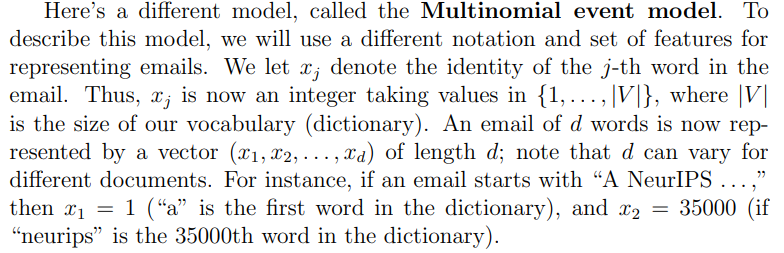

`-` multinomial event model

- 이메일을 나타내는 특성의 셋과 다른 노테이션을 사용할 것이다.
- $x_j$는 독립적인 j번째 이메일의 단어이다.
- 따라서 $x_j$는 이제 {1, . . , |V |}의 값을 취하는 정수이다.
- |V|는 우리의 어휘의 크기이다.
- d 단어의 전자 메일은 길이 d의 벡터로 표시

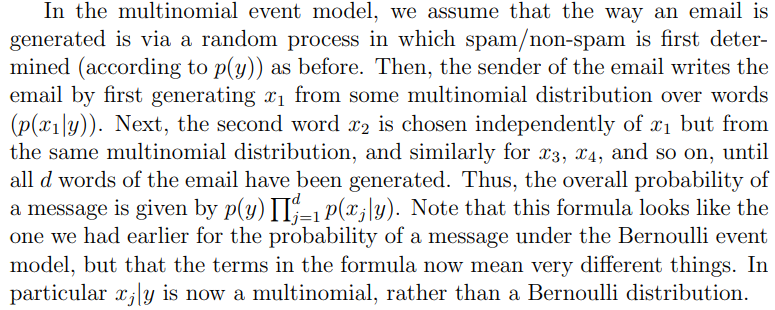

- multinoial event model에서 전자메일이 생성되는 방법은 스팸/비스팸이지를 결정하는 랜덤프로세스를 통해 가정한다.
- 그 다음 단어에 대한 일부 다항 분포$p(x|y)$에서 x1을 생성하여 전자메일을 쓴다.
- 두번째단어는 첫번째 단어와 독립적으로 선택되지만 동일한 다항분포에서 선택되고 다음 d개의 단어까지 마찬가지로 선택이 된다.
- 모든 단어가 생성이 되면 메시지의 전체확률은 $p(y)\prod^d_{j=1}p(x_j|y)$로 주어진다.
- 그렇다면 $x_j|y$는 베르누이 분포가 아닌 다항분포를 의미한다.

- 이메일의 갯수 : n 
- 이메일안에 단어의 수 : d
- n*d의 형태를 가진다고 보면 편할 듯 하다
    

`-` 예시

- 동전던지기
- 앞면 : 1
- 뒷면 : 0

100만번의 독립 시행은 베르누이 분포를 따르게 된다.

In [30]:
np.random.seed(1)
coin100 = np.random.choice([1,0],1000000)
b = sum(coin100),sum([not coin100[i] for i in range(len(coin100))])
print(f'앞면 : {b[0]}, 뒷면 : {b[1]}')

앞면 : 500011, 뒷면 : 499989


In [31]:
# 동전의 앞면의 성공 확률 분포
b[0]/(b[0]+b[1])

0.500011

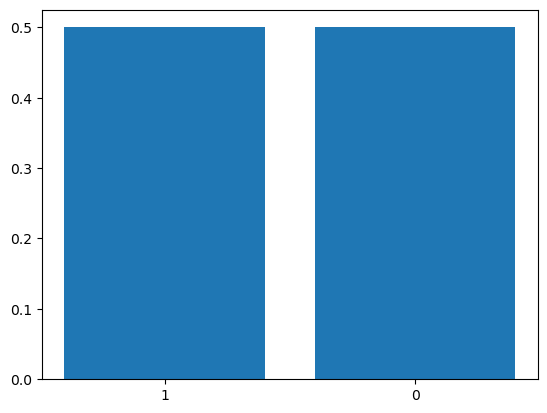

In [32]:
from scipy.stats import bernoulli

# 베르누이 분포의 성공 확률
p = b[0]/(b[0]+b[1])
rv = bernoulli(p)

# 확률 질량 함수(PMF) 계산
x = np.array([0, 1])  # 가능한 결과값 [0, 1]
pmf = rv.pmf(x)

# 그래프 그리기
plt.bar(x, pmf)
plt.xticks(x, ['1', '0'])
plt.show()

d개의 차원으로 독립 시행을 여러번에 걸처 나누게 된다면 정규분포에 근사하게 된다.

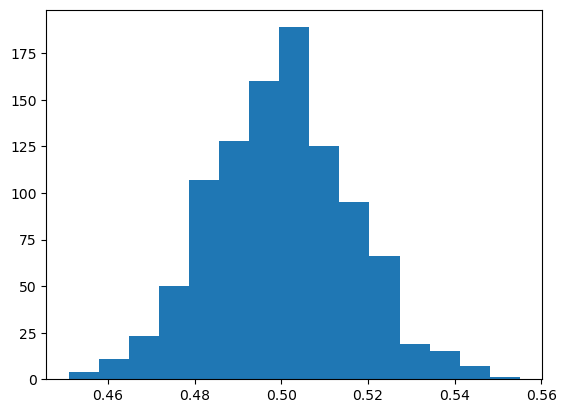

In [749]:
coinpp= coin100.reshape(1000,-1).sum(axis=1) / 1000 # 1000*1000

plt.hist(coinpp, bins=15)
plt.show()

---

p47
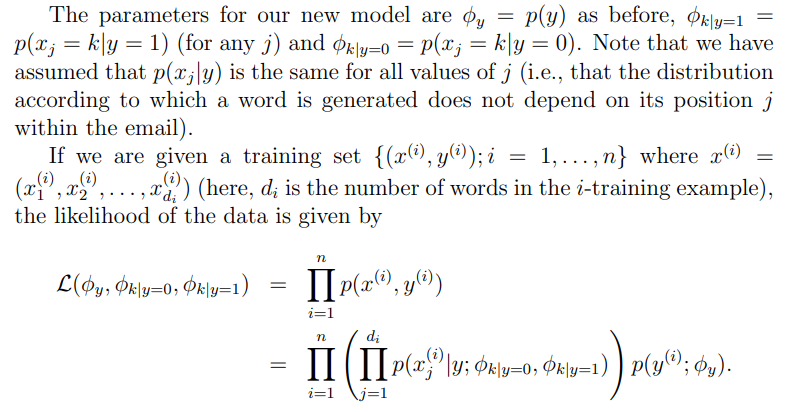

- 우리가 추정할 모수는 그전과 같이 총 3가지가 있다. 
- $p(x_j|y)$는 j의 모든 값에 대해 동일하다고 가정
- 그렇다면 우린 트레이닝 셋이 주어진다.
    - x 단어
    - y 스팸/ 비스팸 여부
    - n 이메일의 개수
    - d 해당 이메일의 어휘의 개수
    
- 

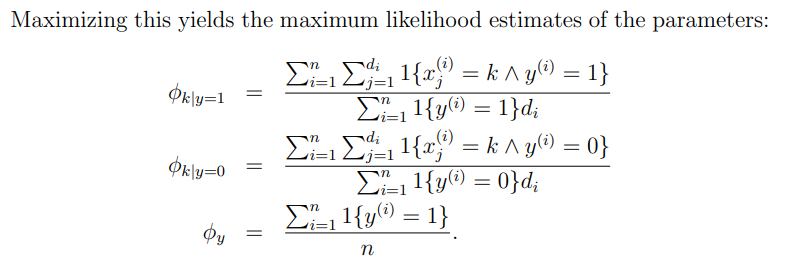

- 분모에 $d_i$가 곱해진 이유는 각 어휘 단어의 갯수만큼 스팸 1로 지정되기 때문에 그만큼 나눠주는 것

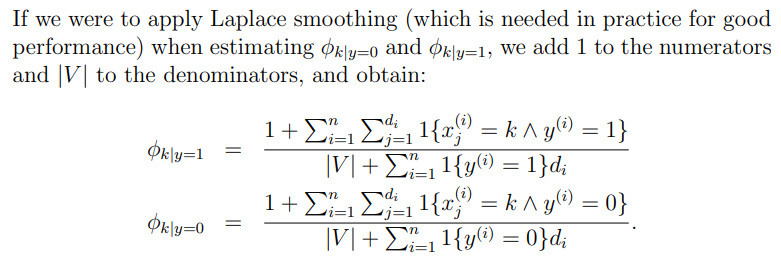

- |V| : 고유 어휘의 숫자(즉 중복된 어휘는 더해지지 않음 이미 1이 더해졌기 때문)
- 중복되지 않은 모든 어휘가 +1이 되었다고 생각하면 된다. 그렇다면 분모에도 중복되 않은 모든 어휘의 수만큼 더해지면 된다.

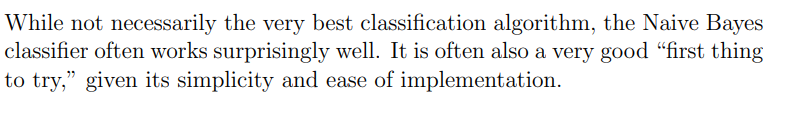

- 나이브베이즈는 종종 놀라울 정도로 잘 작동한다.
- 또한 단순하고 구현이 편하기 때문에 첫번째로 우선 시도해볼만한 분류기이다.

---

# 구현 실습

In [727]:
mail = [
    ('지금 우리 빅 세일 중 어서오세요', 1),
    ('안녕하세요 음식 마음에 안들면 환불 드립니다', 1),
    ('맜있는 사과 맛있는 딸기 드립니다',1),
    ('빅 세일 지금 바로 오세요',1),
    ('우리 지금 여기서 만나자',0),
    ('안녕하세요 용건이 있어 메일 드립니다',0),
    ('우리 맛있는 음식 기억나니 맛있었는데',0),
    ('여기 세일 매우 싸다',0)
]

x = [mail[i][0] for i in range(len(mail))]
x = [x[i].split(' ') for i in range(len(x))]
y = [mail[i][1] for i in range(len(mail))]
x,y

([['지금', '우리', '빅', '세일', '중', '어서오세요'],
  ['안녕하세요', '음식', '마음에', '안들면', '환불', '드립니다'],
  ['맜있는', '사과', '맛있는', '딸기', '드립니다'],
  ['빅', '세일', '지금', '바로', '오세요'],
  ['우리', '지금', '여기서', '만나자'],
  ['안녕하세요', '용건이', '있어', '메일', '드립니다'],
  ['우리', '맛있는', '음식', '기억나니', '맛있었는데'],
  ['여기', '세일', '매우', '싸다']],
 [1, 1, 1, 1, 0, 0, 0, 0])

In [728]:
# 각 단어에 y값 부여
key = [element for sublist in x for element in sublist]
y_xj = [len(x[i])*[y[i]] for i in range(len(mail))]
y_xj = [element for sublist in y_xj for element in sublist]

In [729]:
# list로 각 단어가 1로 치환

lst=[]
for j in range(len(key)):
    [f1(x[i],key[j]).tolist() for i in range(len(x))]
    lst.append([f1(x[i],key[j]).tolist() for i in range(len(x))])

#[f1(x[i],key[j]).tolist() for i in range(len(x)) for j in range(len(key))]

#[element for sublist in goda for element in sublist]
#sum([element for sublist in goda for element in sublist]) / len(y_xj)

In [730]:
flattened_list = []
for sublist1 in lst:
    for sublist2 in sublist1:
        flattened_list.extend(sublist2)

show_class = np.array(flattened_list ).reshape(len(key),-1)
num = sum([y_xj[i] == 1 for i in range(len(y_xj))])

show_class.sum(axis=1)
show_class[:num].sum(axis=0)

x_1= show_class[:num].sum(axis=1).tolist()+[0]*(len(y_xj)-num)
x_0= [0]*(len(show_class[:num].sum(axis=1).tolist()))+show_class[num:].sum(axis=1).tolist()

In [731]:
df =pd.DataFrame({
    'spam_shown' : show_class[:num].sum(axis=0),
    'nospam_shown' :show_class[num:].sum(axis=0),
    'total_shown' : show_class.sum(axis=1),
    'key' : key}
    )

df.head()

,spam_shown,nospam_shown,total_shown,key
0,2,1,3,지금
1,1,2,3,우리
2,2,0,2,빅
3,2,1,3,세일
4,1,0,1,중


In [732]:
a = df.spam_shown/df.total_shown 
n = 6
d = 31
bayes = a * 0.5 / (a*0.5 + (1-a)*0.5)

In [733]:
df = df.assign(bayes = bayes)
df

,spam_shown,nospam_shown,total_shown,key,bayes
0,2,1,3,지금,0.666667
1,1,2,3,우리,0.333333
2,2,0,2,빅,1.000000
3,2,1,3,세일,0.666667
4,1,0,1,중,1.000000
5,1,0,1,어서오세요,1.000000
6,1,1,2,안녕하세요,0.500000
7,1,1,2,음식,0.500000
8,1,0,1,마음에,1.000000
9,1,0,1,안들면,1.000000


In [742]:
testdf = df[[df.key.values.tolist()[i] in ['지금','우리', '음식', '드립니다'] for i in range(len(df))]]
testdf

,spam_shown,nospam_shown,total_shown,key,bayes
0,2,1,3,지금,0.666667
1,1,2,3,우리,0.333333
7,1,1,2,음식,0.500000
11,2,1,3,드립니다,0.666667
16,2,1,3,드립니다,0.666667
19,2,1,3,지금,0.666667
22,1,2,3,우리,0.333333
23,2,1,3,지금,0.666667
30,2,1,3,드립니다,0.666667
31,1,2,3,우리,0.333333


In [743]:
# 우리 지금 음식 드립니다
testdf = df[[df.key.values.tolist()[i] in ['지금','우리', '음식', '드립니다'] for i in range(len(df))]][:4]

a,b,c,d= testdf.bayes.values

a*b*c*d*0.5 /(a*b*c*d*0.5 + (1-a)*(1-b)*(1-c)*(1-d)*0.5)

0.6666666666666666

---

In [649]:
import matplotlib.pyplot as plt

# 학습 데이터
X_train = [
    "저희는 최고의 할인 혜택을 제공하는 스팸 메일입니다.",
    "당신의 신용카드 포인트가 적립되었습니다.",
    "회원님께 드리는 특별 혜택 안내드립니다.",
    "이번 주차 슈퍼세일, 절대 놓치지 마세요!",
    "당첨되었다는 행운의 통보를 알려드립니다.",
    "온라인 쇼핑몰에서 즉시 할인 중입니다.",
    "당신을 위한 새로운 혜택이 등록되었습니다.",
    "나만의 할인 코드를 받으세요.",
    "최신 상품을 저렴한 가격에 만나보세요.",
    "당신의 휴대전화 번호로 특가 상품 정보를 보내드립니다."
]

y_train = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]  # 1: 스팸, 0: 일반 메일

# 테스트 데이터
X_test = [
    "당신의 신용카드에 마일리지가 적립되었습니다.",
    "오늘만 특별한 할인 상품을 소개합니다.",
    "놀라운 할인 이벤트 중입니다.",
    "회원님의 무료 체험 기간이 종료되었습니다."
]

y_test = [1, 0, 1, 0]  # 테스트 데이터의 실제 클래스

# 텍스트 데이터를 벡터화
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# 나이브 베이즈 분류기 모델 생성 및 학습
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

# 테스트 데이터로 예측 수행
y_pred = model.predict(X_test_vectorized)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.75


In [650]:
y_pred

array([1, 0, 0, 0])